# Onur Poyraz 2016705069

## 1. Visualizing Dataset

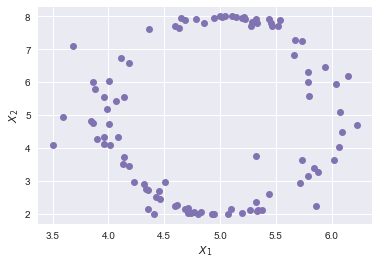

In [5]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

Data = np.loadtxt("data.txt",dtype=float)

plt.figure()
plt.plot(Data[:,0],Data[:,1],'mo')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

In [2]:
mean = np.mat([0.0,0.0])
variance = np.mat([0.0,0.0])
mean[0,0] = np.mean(Data[:,0])
mean[0,1] = np.mean(Data[:,1])
variance[0,0] = np.var(Data[:,0])
variance[0,1] = np.var(Data[:,1])
print "Mean of the data is:"
print mean
print "Variance of the data is:"
print variance

Mean of the data is:
[[ 4.89903  4.85242]]
Variance of the data is:
[[ 0.49351745  5.06030024]]


## 2. Proposing Generative Model

Firstly I plot the density of the variables.

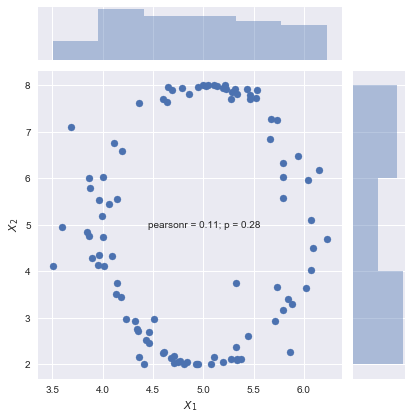

In [3]:
import seaborn as sns
import pandas as pd

sns.set(color_codes=True)
plt.figure()
df = pd.DataFrame(Data, columns=['$X_1$','$X_2$'])
sns.jointplot(x="$X_1$", y="$X_2$", data=df);
plt.show()

We can see that $X_1$ has uniform distribution over the period of 4-6 if we ignore the errors.
I generate my model with uniform distributed $X_1$ and chosen $X_2$'s from ellipse formula which is:

$$X_1^2+X_2^2/9=1$$

## 3. Implementation of Generative Model 

## Without Noise

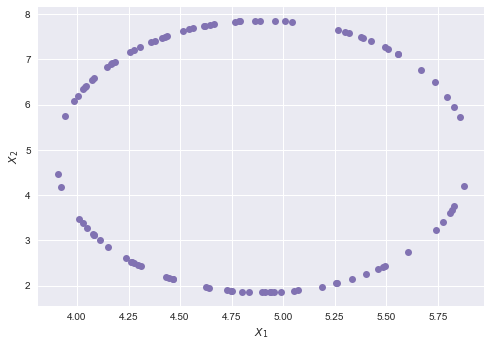

In [4]:
N = 100

X = np.zeros((N,2))
sign=np.sign(np.random.randn(N));
X[:,0] = np.random.uniform(-1,1,N)
X[:,1] = sign*3*np.sqrt(1-np.power(X[:,0],2))
X[:,0] = X[:,0] + mean[0,0]
X[:,1] = X[:,1] + mean[0,1]

plt.figure()
plt.plot(X[:,0],X[:,1],'mo')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

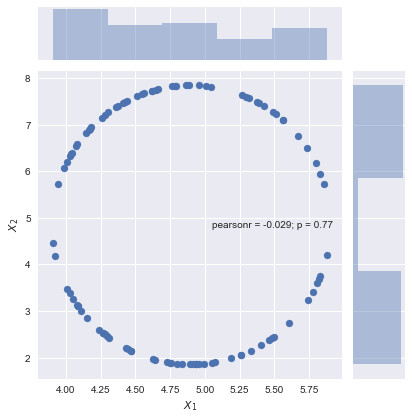

In [6]:
import seaborn as sns
import pandas as pd

sns.set(color_codes=True)
plt.figure()
df = pd.DataFrame(X, columns=['$X_1$','$X_2$'])
sns.jointplot(x="$X_1$", y="$X_2$", data=df);
plt.show()

## With Noise 

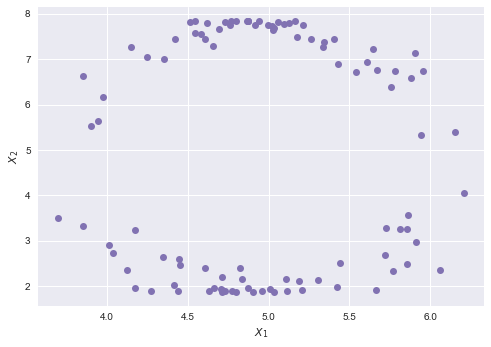

In [7]:
N = 100
noise_x1 = 0.225
noise_x2 = 0.0225
X = np.zeros((N,2))
sign=np.sign(np.random.randn(N));
X[:,0] = np.random.uniform(-1,1,N)
X[:,1] = sign*3*np.sqrt(1-np.power(X[:,0],2)) - noise_x2*sign*np.random.rand(1,N)
X[:,0] = X[:,0] + mean[0,0] + np.random.normal(0,noise_x1,N)
X[:,1] = X[:,1] + mean[0,1]

plt.figure()
plt.plot(X[:,0],X[:,1],'mo')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

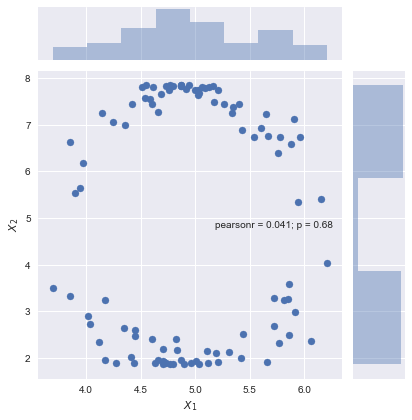

In [8]:
import seaborn as sns
import pandas as pd

sns.set(color_codes=True)
plt.figure()
df = pd.DataFrame(X, columns=['$X_1$','$X_2$'])
sns.jointplot(x="$X_1$", y="$X_2$", data=df);
plt.show()

## 4. Visualizing the Generating Data with Give Data 

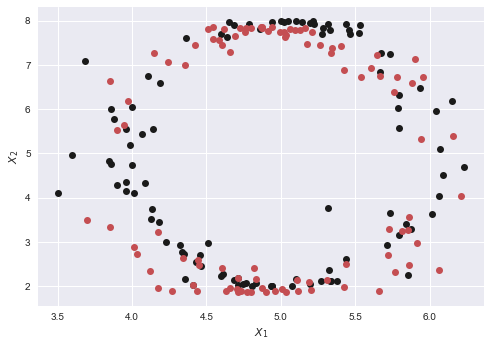

In [9]:
plt.figure()
plt.plot(Data[:,0],Data[:,1],'ko')
plt.plot(X[:,0],X[:,1],'ro')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

## 5. Discussion 

I generate the data from the shape of the data. It is elliptical data and my generative model generates elliptical data. After that I plot the histogram of the given data and I see that it has uniform distribution over $X_1$. From the ellipse formula I generate $X_2$'s from $X_1$. This is one way of doing that. I could also make $X_2$ is uniform distribution over (0,2$pi$) and which also give that elliptical results.